In [1]:
import numpy as np
import matplotlib.pyplot as plt



def draw(Cloth_H, Cloth_W, Bag_H, Bag_W, p):
        a,b,c,d = Cloth_H, Cloth_W, Bag_H, Bag_W
        factor = Cloth_H/Cloth_W
        if factor>1:
            fig, ax = plt.subplots(1,1,figsize=(10*1/factor,10))
        else:
            fig, ax = plt.subplots(1,1,figsize=(10,10*factor))


        x_zero = 0
        for orientation in p:
            if orientation == 'A':
                ax.hlines(y = Cloth_H   ,xmin = x_zero   , xmax = Cloth_W  , lw = 2, color = 'g')
                ax.hlines(y = Cloth_H-Bag_H   ,xmin = x_zero   , xmax = Cloth_W  , lw = 2, color = 'g')
                for ii in range(int((Cloth_W-x_zero)//Bag_W+1)):
                    ax.vlines(x = x_zero+ii*Bag_W   ,ymin = Cloth_H-Bag_H   , ymax = Cloth_H  , lw = 2, color = 'orange')
                x_range = np.arange(x_zero+ii*Bag_W,Cloth_W+1)
                ax.fill_between(x_range,y1=[Cloth_H]*len(x_range),y2=[Cloth_H-Bag_H]*len(x_range),color='grey',alpha=0.7)
                Cloth_H-=Bag_H

            if orientation == 'C':
                ax.hlines(y = Cloth_H   ,xmin = x_zero   , xmax = Cloth_W  , lw = 2, color = 'g')
                ax.hlines(y = Cloth_H-Bag_W   ,xmin = x_zero   , xmax = Cloth_W  , lw = 2, color = 'g')
                for ii in range(int((Cloth_W-x_zero)//Bag_H+1)):
                    ax.vlines(x = x_zero+ii*Bag_H   ,ymin = Cloth_H-Bag_W   , ymax = Cloth_H  , lw = 2, color = 'orange')
                x_range = np.arange(x_zero+ii*Bag_H,Cloth_W+1)
                ax.fill_between(x_range,y1=[Cloth_H]*len(x_range),y2=[Cloth_H-Bag_W]*len(x_range),color='grey',alpha=0.7)
                Cloth_H-=Bag_W

            if orientation == 'B':
                ax.vlines(x = x_zero         ,ymin = 0   , ymax = Cloth_H  , lw = 2, color = 'g')
                ax.vlines(x = x_zero+Bag_W   ,ymin = 0   , ymax = Cloth_H  , lw = 2, color = 'g')
                for ii in range(int(Cloth_H//Bag_H+1)):
                    ax.hlines(y = Cloth_H-ii*Bag_H   ,xmin = x_zero   , xmax = x_zero+Bag_W  , lw = 2, color = 'orange')
                
                y_range = np.arange(0,Cloth_H-ii*Bag_H+1)
                ax.fill_betweenx(y_range,x1=[x_zero]*len(y_range),x2=[x_zero+Bag_W]*len(y_range),color='grey',alpha=0.7)                
                x_zero+=Bag_W

            if orientation == 'D':
                ax.vlines(x = x_zero         ,ymin = 0   , ymax = Cloth_H  , lw = 2, color = 'g')
                ax.vlines(x = x_zero+Bag_H   ,ymin = 0   , ymax = Cloth_H  , lw = 2, color = 'g')
                for ii in range(int(Cloth_W//Bag_W+1)):
                    ax.hlines(y = Cloth_H-ii*Bag_W   ,xmin = x_zero   , xmax = x_zero+Bag_H  , lw = 2, color = 'orange')
                y_range = np.arange(0,Cloth_H-ii*Bag_W+1)
                ax.fill_betweenx(y_range,x1=[x_zero]*len(y_range),x2=[x_zero+Bag_H]*len(y_range),color='grey',alpha=0.7)                
                
                x_zero+=Bag_H

    # make boundries of graph
        Cloth_H, Cloth_W, Bag_H, Bag_W = a,b,c,d
        ax.hlines(y = 0         ,xmin = 0   , xmax = Cloth_W  , lw = 2, color = 'b')
        ax.hlines(y = Cloth_H   ,xmin = 0   , xmax = Cloth_W  , lw = 2, color = 'b')
        ax.vlines(x = 0         ,ymin = 0   , ymax = Cloth_H  , lw = 2, color = 'b')
        ax.vlines(x = Cloth_W   ,ymin = 0   , ymax = Cloth_H  , lw = 2, color = 'b')



def optimization_wrapper(Cloth_H, Cloth_W ,Bag_H, Bag_W):
    L = Cloth_H
    W = Cloth_W
    l = Bag_H
    w = Bag_W
    
    dp = dict()
    area_avail = L*W
    import matplotlib.pyplot as plt
    def optimization(L , W):
        temp = dp.get((L,W),None)
        if temp is not None:
            return temp
        if (L<=0) or (W<=0):
            return 0,'-'
        if (L < w) or (W < w):
            return 0,'-'    

        options =[]
        if L-l >= 0:
            value = (W // w) + optimization(L-l , W)[0]
            options.append((value,'A'))
        if W-w >= 0:
            value = (L // l) + optimization(L   , W-w)[0]
            options.append((value,'B'))
        if L-w >= 0:
            value = (W // l) + optimization(L-w , W)[0]
            options.append((value,'C'))
        if W-l >= 0:
            value = (L // w) + optimization(L   , W-l)[0]
            options.append((value,'D'))
        dp[(L,W)]=max(options,key=lambda x:x[0])
        return dp[(L,W)] 

    optimization(L,W)
    area_used = w*l*int(dp[(L,W)][0])
    #print(dp)
    print("Available area:         ",area_avail)
    print('Total number of pieces: ', dp[(L,W)]) 
    print('Area used:              ', area_used)
    print('Area un-used:           ', area_avail-area_used)
    print('Wastage:                ', (area_avail-area_used)/area_avail*100, '%' )
    
    p = []
    while (L >= w and W >= w):
        cut = dp[(L,W)]
        orientation = cut[1]
        p.append(orientation)
        if orientation == 'A':
            L = L-l
        elif orientation == 'B':
            W = W-w
        elif orientation == 'C':
            L = L-w
        elif orientation == 'D':
            W = W-l
            
     # Drawing graphs
    
    draw(Cloth_H, Cloth_W, Bag_H, Bag_W, p)
    return p

Available area:          6930
Total number of pieces:  (12, 'C')
Area used:               6720
Area un-used:            210
Wastage:                 3.0303030303030303 %


['C', 'C', 'C']

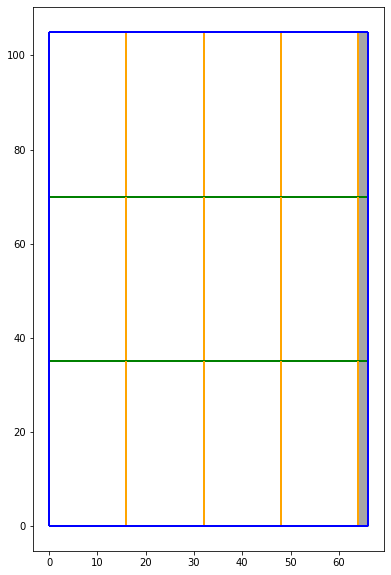

In [3]:
optimization_wrapper(105,66,16,35)

Available area:          15104
Total number of pieces:  (25.0, 'C')
Area used:               14600.0
Area un-used:            504.0
Wastage:                 3.3368644067796613 %


['C', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C']

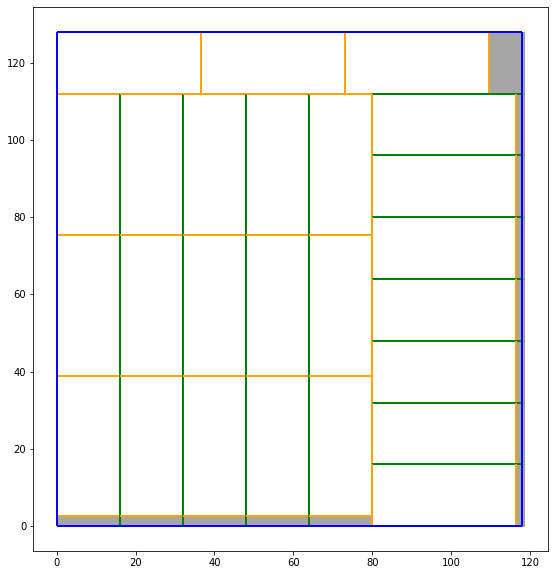

In [5]:
optimization_wrapper(128, 118, 36.5, 16)

Available area:          40602
Total number of pieces:  (60, 'A')
Area used:               37740
Area un-used:            2862
Wastage:                 7.048913846608541 %


['A', 'A', 'A', 'A', 'A', 'C']

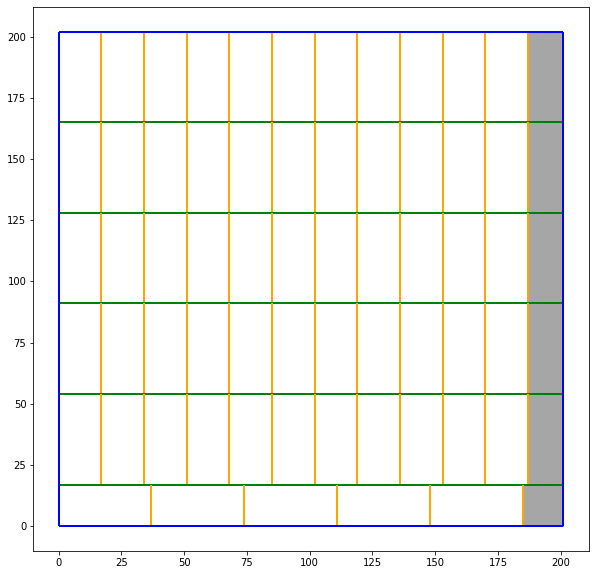

In [6]:
optimization_wrapper(202, 201, 37, 17)

Available area:          14278
Total number of pieces:  (132, 'A')
Area used:               13200
Area un-used:            1078
Wastage:                 7.550077041602465 %


['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']

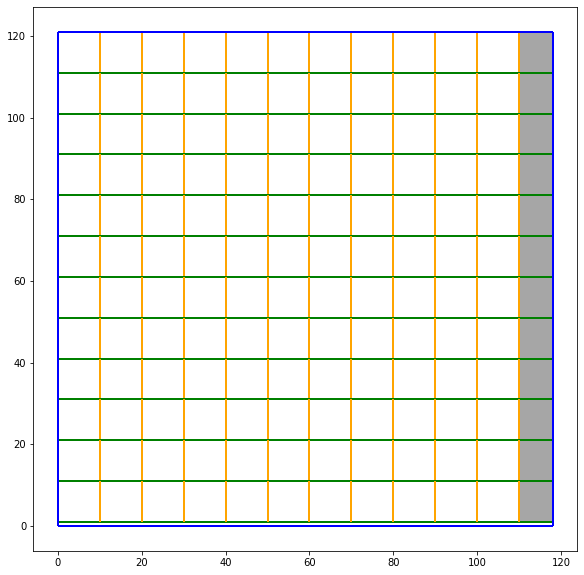

In [8]:
optimization_wrapper(121, 118, 10, 10)

In [ ]:
def draw(M_L, M_W, M_l, M_w, p):
    import matplotlib.pyplot as plt
    factor = M_L/M_W
    if factor>1:
        fig, ax = plt.subplots(1,1,figsize=(10*1/factor,10))
    else:
        fig, ax = plt.subplots(1,1,figsize=(10,10*factor))
    
    # make boundries of graph
    ax.hlines(y = 0     ,xmin = 0   , xmax = M_W  , lw = 2, color = 'b')
    ax.hlines(y = M_L   ,xmin = 0   , xmax = M_W  , lw = 2, color = 'b')
    ax.vlines(x = 0     ,ymin = 0   , ymax = M_L  , lw = 2, color = 'b')
    ax.vlines(x = M_W   ,ymin = 0   , ymax = M_L  , lw = 2, color = 'b')
    
    #if p =='A':
    # copying M_W and M_w to new variables so they can be uesd in loops
    M_W_a = M_W
    M_w_a = M_w
    M_L_a = M_L
    M_l_a = M_l
    for i in range(len(p)):
    #    print(i)
        if p[i] == 'A':
            for j in range(1,int(M_W_a // M_w_a)+1):
                ax.vlines(x = 0,         ymin = M_L,       ymax = M_L-M_l,   lw = 2, color = 'orange')
                ax.hlines(y = M_L-M_l,   xmin = 0,         xmax = j*M_w,     lw = 2, color = 'orange')
                ax.vlines(x = j*M_w,     ymin = M_L,       ymax = M_L-M_l,   lw = 2, color = 'orange')
                ax.hlines(y = M_L,       xmin = j*M_w,     xmax = 0,         lw = 2, color = 'orange')
            M_L = M_L-M_l
        if p[i] == 'B':
            #for j in range(1, int(M_L_a // M_l_a)+1):
            ax.vlines(x = 0 ,        ymin = M_L,       ymax = M_L-M_l,   lw = 2, color = 'orange')
            ax.hlines(y = M_L-M_l,   xmin = 0,         xmax = M_w,       lw = 2, color = 'orange')
            ax.vlines(x = M_w,       ymin = M_L,       ymax = M_L-M_l,   lw = 2, color = 'orange')
            ax.hlines(y = M_L,       xmin = M_w,       xmax = 0,         lw = 2, color = 'orange')
            M_L = M_L-M_l
            for j in range( int(M_L_a // M_l_a)):
                ax.vlines(x = 0,         ymin = M_L-j*M_l,      ymax = M_l,       lw = 2, color = 'orange')
                ax.hlines(y = M_L-j*M_l, xmin = 0,              xmax = M_w,       lw = 2, color = 'orange')
                ax.vlines(x = M_w,       ymin = M_L-j*M_l,      ymax = M_l,       lw = 2, color = 'orange')
            M_W = M_W-M_w
        
        if p[i] == 'C':
            for j in range(1, int(M_W_a // M_w_a)+1):
                ax.vlines(x = 0,         ymin = M_L,       ymax = M_L-M_w,   lw = 2, color = 'orange')
                ax.hlines(y = M_L-M_w,   xmin = 0,         xmax = M_l,       lw = 2, color = 'orange')
                ax.vlines(x = M_l,       ymin = M_W-M_w,    ymax = M_w,   lw = 2, color = 'orange')
                #ax.hlines(y = M_L,       xmin = j*M_w,     xmax = 0,         lw = 2, color = 'orange')

                

                

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def draw(Cloth_H, Cloth_W, Bag_H, Bag_W, p):
    a,b,c,d = Cloth_H, Cloth_W, Bag_H, Bag_W
    factor = Cloth_H/Cloth_W
    if factor>1:
        fig, ax = plt.subplots(1,1,figsize=(10*1/factor,10))
    else:
        fig, ax = plt.subplots(1,1,figsize=(10,10*factor))
    
    
    x_zero = 0
    for orientation in p:
        if orientation == 'A':
            ax.hlines(y = Cloth_H   ,xmin = x_zero   , xmax = Cloth_W  , lw = 2, color = 'g')
            ax.hlines(y = Cloth_H-Bag_H   ,xmin = x_zero   , xmax = Cloth_W  , lw = 2, color = 'g')
            for ii in range(Cloth_W//Bag_W+1):
                ax.vlines(x = ii*Bag_W   ,ymin = Cloth_H-Bag_H   , ymax = Cloth_H  , lw = 2, color = 'orange')
            Cloth_H-=Bag_H
                
        if orientation == 'C':
            ax.hlines(y = Cloth_H   ,xmin = x_zero   , xmax = Cloth_W  , lw = 2, color = 'g')
            ax.hlines(y = Cloth_H-Bag_W   ,xmin = x_zero   , xmax = Cloth_W  , lw = 2, color = 'g')
            for ii in range(Cloth_W//Bag_H+1):
                ax.vlines(x = ii*Bag_H   ,ymin = Cloth_H-Bag_W   , ymax = Cloth_H  , lw = 2, color = 'orange')
            Cloth_H-=Bag_W
            
        if orientation == 'B':
            ax.vlines(x = x_zero         ,ymin = 0   , ymax = Cloth_H  , lw = 2, color = 'g')
            ax.vlines(x = x_zero+Bag_W  ,ymin = 0   ,  ymax = Cloth_H  , lw = 2, color = 'g')
            for ii in range(Cloth_H//Bag_H+1):
                ax.hlines(y = Cloth_H-ii*Bag_H   ,xmin = x_zero   , xmax = x_zero+Bag_W  , lw = 2, color = 'orange')
            x_zero+=Bag_W
            
        if orientation == 'D':
            ax.vlines(x = x_zero         ,ymin = 0   , ymax = Cloth_H  , lw = 2, color = 'g')
            ax.vlines(x = x_zero+Bag_H  ,ymin = 0   ,  ymax = Cloth_H  , lw = 2, color = 'g')
            for ii in range(Cloth_H//Bag_W+1):
                ax.hlines(y = Cloth_H-ii*Bag_W   ,xmin = x_zero   , xmax = x_zero+Bag_H  , lw = 2, color = 'orange')
            x_zero+=Bag_W
            
    # make boundries of graph
    Cloth_H, Cloth_W, Bag_H, Bag_W = a,b,c,d
    ax.hlines(y = 0         ,xmin = 0   , xmax = Cloth_W  , lw = 2, color = 'b')
    ax.hlines(y = Cloth_H   ,xmin = 0   , xmax = Cloth_W  , lw = 2, color = 'b')
    ax.vlines(x = 0         ,ymin = 0   , ymax = Cloth_H  , lw = 2, color = 'b')
    ax.vlines(x = Cloth_W   ,ymin = 0   ,  ymax = Cloth_H  , lw = 2, color = 'b')
    
    
    
    
    
    
    
    

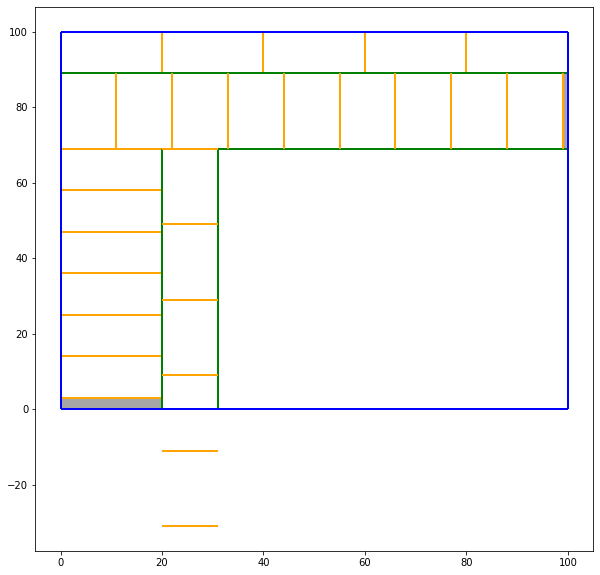

In [4]:
draw(100,100,11,20,["A",'C','B','D'])